In [2]:
# ! pip install rasterio 1>/dev/null

from google.colab import drive
drive.mount('/content/drive')

import sys
# sys.path.append('/content/drive/MyDrive/sen2dwater/USANNIOMIT')
sys.path.append('/content/drive/MyDrive/SEN2DWATER')

from dataio.datahandler import datahandler
from dataio.normalizer import normalizer
from dataio.datareader import datareader


import matplotlib.pyplot as plt
import os

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: ignored

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Load and Visualize Earth Observation Data

## 1. Load the dataset

Using the *datahandler* class we can load the images paths. Please note the the expected folder structure is the following:

```
datasets 
    │
    └───dataset_1
        └───zone_1
        │   └───t0.tif
        │   └───t1.tif
        │   └─── ...
        │   └───t30.tif
        .   .   .
        .   .   .
        .   .   .
        │
        └───zone_n
            └───t0.tif
            └───t1.tif
            └─── ...
            └───t30.tif

```

In [ ]:
dataset_root = os.path.join('datasets', 's2-demo')
dh = datahandler(dataset_root)

The datahandler creates a dictionary where the keys are the zone and the values for each key are the paths to the images as shown ahed:

In [ ]:
for k in dh.paths.keys():
    print(k)
    for i, img in enumerate(dh.paths[k]):
        print('\t{:10s}{:30s}'.format('Img '+str(i+1), img))
    print()

Tevere_Lat_41.75675_Lon_12.27669
	Img 1     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2016-08-24.tif
	Img 2     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2016-09-03.tif
	Img 3     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2016-11-12.tif
	Img 4     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2017-01-01.tif
	Img 5     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2017-04-21.tif
	Img 6     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2017-05-31.tif
	Img 7     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2017-07-05.tif
	Img 8     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2017-10-13.tif
	Img 9     datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2017-11-17.tif
	Img 10    datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2018-02-10.tif
	Img 11    datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2018-04-21.tif
	Img 12    datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.27669/2018-06-10.tif
	Img 13    datasets/s2-demo/Tevere_Lat_41.75675_Lon_12.

We can split these paths to create train and validation sets.

In [ ]:
train_set, val_set = dh.split(split_factor = 0.5)

These two are again dictionary as above.

## 2. Load images

To load an image we can use the *load* (for single image) or *generator* (data loader of the entire series) of the *dataloader* class.

### 2.1 With *load* function

In [ ]:
key      = list(dh.paths.keys())[0] # Zone 0
img_path = dh.paths[key][0]         # Image 0

# Load image
img, metadata = datareader.load(img_path)

print('Image shape', img.shape) # Width, Height, Bands

Image shape (317, 318, 16)


To visualize correctly the image we should normalized it (for sen2 we have to divide by 10.000)

In [ ]:
img = normalizer.max_scaler(img, mmax = 10000, clip = [0,1])

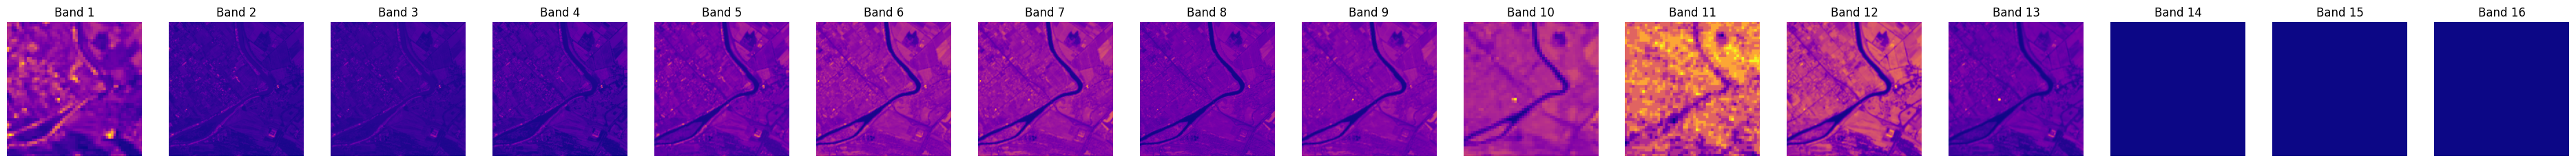

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = img.shape[-1], figsize = (3*img.shape[-1], 3))
for i in range(img.shape[-1]):
    axes[i].imshow(img[:,:,i], cmap = 'plasma')
    axes[i].axis(False)
    axes[i].set_title('Band {}'.format(i+1))
plt.show()

To create and RGB composite, we can use the Red (B4), Green (B3) and Blue (B2) bands of Sentinel-2

In [ ]:
rgb = np.concatenate((img[:,:,3:4], img[:,:,2:3], img[:,:,1:2]), axis = -1)

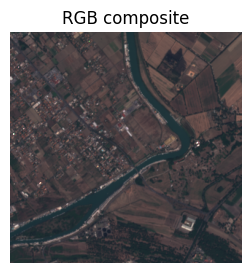

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))
ax.imshow(np.clip(2*rgb, 0, 1)) # 2* to adjust the brightness
ax.axis(False)
ax.set_title('RGB composite')
plt.show()